In [77]:
smap= pd.read_csv('SMAP_site.csv')

In [78]:
smap.set_index('Unnamed: 0', inplace=True)
smap.index= pd.to_datetime(smap.index, format='%Y%m%d')
smap= smap.sort_index()
smap[smap==-9999]= np.nan
smap=smap.loc[:pd.to_datetime('20190702')]
# smap.apply(lambda x: len(x[~pd.isna(x)])/len(smap), axis=0).argmax()

In [27]:
smap['6']

Unnamed: 0
2015-04-01    0.088007
2015-04-02    0.107143
2015-04-03         NaN
2015-04-04    0.065996
2015-04-05    0.060645
                ...   
2020-01-26    0.169054
2020-01-28    0.156664
2020-01-29    0.161368
2020-01-30    0.232975
2020-01-31         NaN
Name: 6, Length: 1729, dtype: float64

In [84]:
ilocs= smap[pd.isna(smap['6'])].index

In [32]:
import datetime

In [34]:
datetime.timedelta(days=1)

datetime.timedelta(1)

In [56]:
noah= pd.read_csv('Noah_site.csv')

In [57]:
noah.set_index('Unnamed: 0', inplace=True)
noah.index= pd.to_datetime(noah.index, format='%Y%m%d %H:%M:%S')
noah= noah.sort_index()

In [59]:
noah.min().min()

4.840155601501465

In [ ]:
noah= pd.read_csv('mesonet.csv')

In [85]:
from_dates=[]
to_dates= []
first=True
for i in range(len(ilocs)-1):
    if first:
        from_date=smap.index[0]
        to_date=ilocs[0] - datetime.timedelta(days=1)
        first=False
    else:
        from_date= ilocs[i] + datetime.timedelta(days=1)
        to_date= ilocs[i+1]- datetime.timedelta(days=1)
    from_dates.append(from_date)
    to_dates.append(to_date)

from_dates.append(pd.to_datetime('20150401'))
to_dates.append(pd.to_datetime('20190702'))
from_dates.append(pd.to_datetime('20150401'))
to_dates.append(pd.to_datetime('20190702'))

In [86]:
import altair as alt
data = pd.DataFrame()
data['from']= from_dates
data['to']= to_dates
data['product']= 'smap'
data['product'].iloc[-1]= 'Mesonet'
data['product'].iloc[-2]= 'Noah'

In [43]:
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [83]:
data

,from,to,product
0,2015-04-01,2015-04-02,smap
1,2015-04-12,2015-04-18,smap
2,2015-04-20,2015-05-11,smap
3,2015-05-13,2015-05-13,smap
4,2015-05-15,2015-05-14,smap
...,...,...,...
215,2020-01-19,2020-01-22,smap
216,2020-01-24,2020-01-23,smap
217,2020-01-25,2020-01-30,smap
218,2015-04-01,2019-07-02,Noah


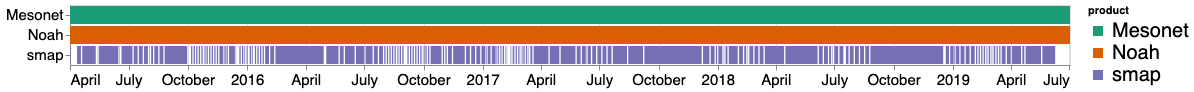

In [106]:

alt.Chart(data).mark_bar().encode(
    x='from',
    x2='to',
    y='product',
    color=alt.Color('product', scale=alt.Scale(scheme='dark2'))
).properties(width=1000).configure_axis(labelFontSize=15, title=None).configure_legend(labelFontSize=20).configure_title()

In [17]:
smap= pd.read_csv('SMAP_site.csv').set_index('Unnamed: 0')

In [18]:
smap.index= pd.to_datetime(smap.index, format='%Y%m%d')
smap= smap.sort_index()
smap[smap==-9999]= np.nan
smap=smap.loc[:pd.to_datetime('20190702')]

In [46]:
sorted(smap.apply(lambda x: len(x[(~pd.isna(x))]), axis=0))[::-1]

[1537,
 1346,
 1300,
 1292,
 1280,
 1277,
 1265,
 1265,
 1263,
 1261,
 1232,
 1198,
 1097,
 1089,
 1089,
 1089,
 1089,
 1088,
 1088,
 1087,
 1087,
 1086,
 1086,
 1086,
 1086,
 1085,
 1085,
 1085,
 1085,
 1085,
 1084,
 1084,
 1084,
 1084,
 1084,
 1083,
 1082,
 1082,
 1081,
 1081,
 1081,
 1080,
 1079,
 1078,
 1078,
 1078,
 1078,
 1077,
 1075,
 1075,
 1075,
 1071,
 1069,
 1068,
 1067,
 1066,
 1065,
 1036,
 1034,
 1031,
 1010,
 1009,
 1007,
 1006,
 1006,
 1005,
 985,
 957,
 957,
 947,
 927,
 919,
 916,
 907,
 905,
 899,
 899,
 897,
 896,
 895,
 895,
 895,
 895,
 895,
 895,
 894,
 894,
 893,
 893,
 893,
 892,
 892,
 890,
 890,
 890,
 889,
 888,
 888,
 887,
 886,
 886,
 885,
 885,
 879,
 877,
 877,
 872,
 842,
 840,
 840,
 833,
 829,
 817,
 803,
 760,
 705]

In [16]:
smap.index.month% 12 + 3

Int64Index([7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
            ...
            9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
           dtype='int64', name='Unnamed: 0', length=1537)

In [23]:
smap

,110,1,2,116,135,111,126,6,8,9,10,11,12,14,15,...,94,95,137,97,136,99,100,101,102,132,104,105,106,107,108
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-04-01,0.194477,NaN,0.170099,0.108790,NaN,0.185221,NaN,0.088007,0.072626,0.185681,NaN,0.138791,0.066451,0.131449,NaN,...,0.239011,NaN,NaN,NaN,0.242766,0.217560,0.106528,0.199150,0.190997,NaN,NaN,NaN,NaN,0.071657,NaN
2015-04-02,0.101527,0.239310,0.105358,0.124612,0.269818,0.111048,0.171979,0.107143,0.087372,0.126907,0.262046,0.149120,0.042726,0.108825,0.236647,...,0.126907,0.239310,0.265678,0.303106,0.109773,0.116774,0.094866,0.101527,0.124612,0.318112,0.304337,0.286676,0.305297,0.105358,0.239177
2015-04-03,0.168554,0.288328,NaN,0.093478,0.384512,0.165122,0.222526,NaN,NaN,0.118361,0.257237,0.121930,NaN,0.125148,0.227992,...,NaN,0.284745,NaN,0.349008,0.192994,0.186688,0.085947,0.180341,0.132382,0.376712,0.311578,0.424563,0.442700,0.068868,0.255294
2015-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065996,0.056001,NaN,NaN,NaN,0.050023,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-05,0.155351,0.265553,0.099805,0.082118,NaN,0.143386,0.202815,0.060645,0.051897,0.115860,NaN,0.142360,0.047849,0.110742,NaN,...,0.121187,0.268646,NaN,NaN,0.182292,0.172200,0.093346,0.161836,0.123079,NaN,0.170142,NaN,0.166281,0.073206,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-15,0.169647,NaN,0.222167,0.265405,NaN,0.148136,NaN,0.084337,0.136243,0.146900,NaN,0.467020,0.121731,0.267699,NaN,...,0.204388,NaN,NaN,NaN,0.182357,0.246847,0.174636,0.195901,0.128517,NaN,NaN,NaN,NaN,0.113173,NaN
2019-06-16,0.342612,0.394912,0.192496,0.281853,0.314742,0.321662,0.426738,0.157665,0.131764,0.235720,0.324617,0.437831,0.070314,0.414467,0.353904,...,0.235720,0.394912,0.328031,0.285112,0.313376,0.440050,0.290651,0.342612,0.281853,0.285908,0.307465,0.296087,0.292156,0.192496,0.352086
2019-06-17,0.259933,0.192896,0.238630,0.252366,0.392787,0.232179,0.330517,0.294152,NaN,0.167317,0.309550,0.846401,NaN,0.254339,0.161328,...,0.167317,0.192896,NaN,0.460807,0.205485,0.223651,0.199143,0.259933,0.196285,0.372796,0.294884,0.412327,0.321689,0.238630,0.199868


In [27]:
smap.loc[:,'seasons']= ((smap.index.month % 12 + 3) // 3).map({1:'DJF', 2: 'MAM', 3:'JJA', 4:'SON'})

In [44]:
sorted(smap.apply(lambda x: len(x[(~pd.isna(x)) & (smap.seasons=='MAM')]), axis=0))[::-1]

[427,
 394,
 362,
 361,
 359,
 357,
 355,
 354,
 354,
 351,
 350,
 335,
 304,
 304,
 304,
 303,
 303,
 303,
 303,
 303,
 303,
 303,
 303,
 303,
 303,
 303,
 303,
 303,
 303,
 303,
 303,
 303,
 303,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 302,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 300,
 300,
 300,
 298,
 297,
 297,
 293,
 293,
 292,
 292,
 291,
 279,
 271,
 264,
 264,
 262,
 261,
 255,
 252,
 252,
 251,
 251,
 251,
 251,
 251,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 249,
 249,
 249,
 249,
 249,
 249,
 249,
 249,
 249,
 248,
 248,
 248,
 248,
 248,
 248,
 248,
 248,
 248,
 248,
 247,
 242,
 236,
 234,
 228,
 228,
 228,
 225,
 215,
 196]